In [1]:
import numpy as np
X = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])

In [2]:
X

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [3]:
y

array([[ 871],
       [1132],
       [1042],
       [1356],
       [1488],
       [1638],
       [1569],
       [1754],
       [1866],
       [1900]])

In [4]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [5]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [6]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [8]:
y

array([[-1.75751985],
       [-0.98083058],
       [-1.24865447],
       [-0.31424669],
       [ 0.07856167],
       [ 0.52493481],
       [ 0.31960317],
       [ 0.87013004],
       [ 1.20342199],
       [ 1.3045999 ]])

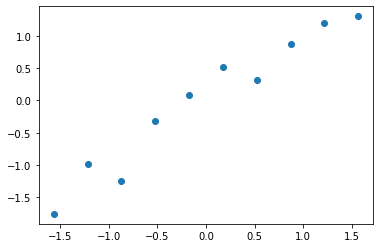

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)

# Fórmula da regressão linear simples
y = b0 + b1 * x

In [10]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [11]:
import tensorflow as tf

In [12]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [13]:
# Função para retornar a previsão usando a fórmula da regressão linear
def linear_regression(x):
    return b0 + b1 * x

In [14]:
linear_regression(40)

<tf.Tensor: shape=(), dtype=float32, numpy=28.94>

In [57]:
# Mean square error
def error(y_pred, y_true):
    return tf.reduce_mean(tf.pow(y_pred - y_true, 2))

In [58]:
# Stochastic Gradient Descent Optimizer
optimizer = tf.optimizers.SGD(learning_rate = 0.001)

In [59]:
# Treinamento
for i in range(1000):
    # Agrupa a computação dentro de um GradientTape
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = error(pred, y)

    # Computa os gradientes
    gradients = g.gradient(loss, [b1, b0])

    # Atualiza b1 e b0 seguindo os gradientes
    optimizer.apply_gradients(zip(gradients, [b1, b0]))

In [60]:
b0

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.07293497>

In [61]:
b1

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.9359134>

In [62]:
previsoes = b0 + b1 * X + 
previsoes

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-1.3933595 ],
       [-1.0675163 ],
       [-0.74167305],
       [-0.41582984],
       [-0.08998664],
       [ 0.23585658],
       [ 0.56169975],
       [ 0.887543  ],
       [ 1.2133863 ],
       [ 1.5392295 ]], dtype=float32)>

In [63]:
type(previsoes)

tensorflow.python.framework.ops.EagerTensor

In [64]:
previsoes = previsoes.numpy()

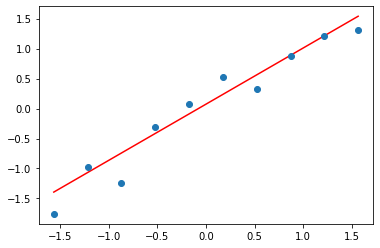

In [65]:
plt.plot(X, previsoes, color = 'red')
plt.plot(X, y, 'o')

In [66]:
scaler_x.transform([[40]])

array([[-0.03481553]])

In [67]:
previsao = b0.numpy() + b1.numpy() * scaler_x.transform([[40]])
previsao

array([[0.04035065]])

In [68]:
previsao = scaler_y.inverse_transform(previsao)
previsao

array([[1475.15950152]])

In [69]:
y1 = scaler_y.inverse_transform(y)
y1

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1488.],
       [1638.],
       [1569.],
       [1754.],
       [1866.],
       [1900.]])

In [70]:
previsoes1 = scaler_y.inverse_transform(previsoes)
previsoes1

array([[ 993.37305],
       [1102.87   ],
       [1212.367  ],
       [1321.8638 ],
       [1431.3607 ],
       [1540.8577 ],
       [1650.3545 ],
       [1759.8514 ],
       [1869.3484 ],
       [1978.8453 ]], dtype=float32)

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y1, previsoes1)
mse = mean_squared_error(y1, previsoes1)

In [72]:
mae

67.91875

In [74]:
mse

7153.913036322594